The following objects are masked from Lab3data (pos = 6):

    Q1Correct, Q1Gender, Q1Group

The following objects are masked from Lab3data (pos = 7):

    Q1Correct, Q1Gender, Q1Group

The following objects are masked from Lab3data (pos = 8):

    Q1Correct, Q1Gender, Q1Group

The following object is masked from Lab3data (pos = 9):

    Q1Group



            Df Sum Sq Mean Sq F value   Pr(>F)    
groups       3  63.79  21.264   9.212 0.000495 ***
Residuals   20  46.17   2.308                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

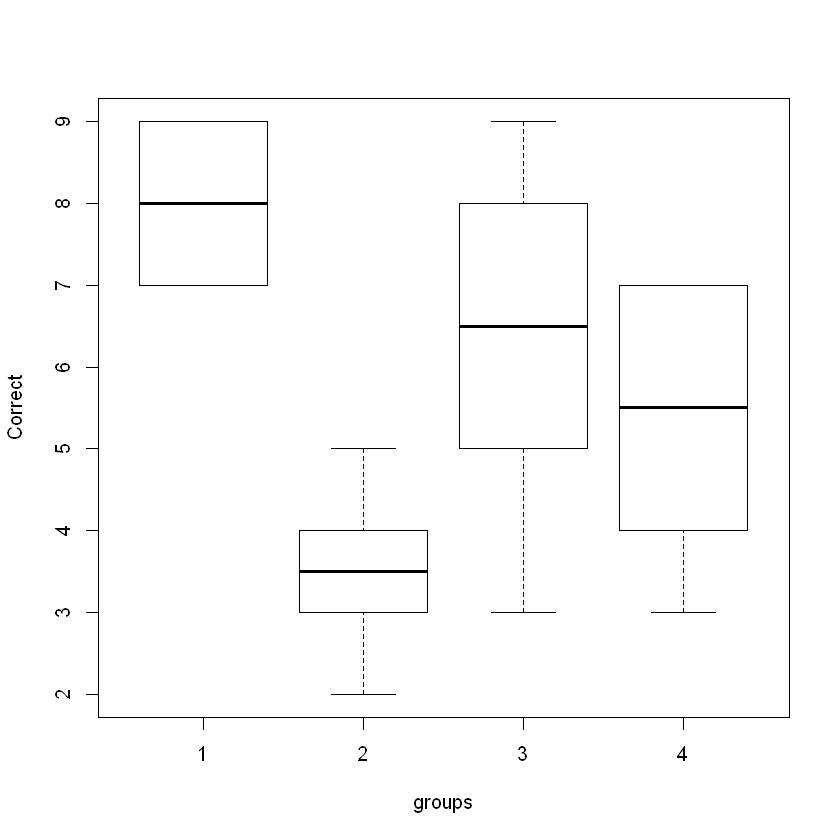

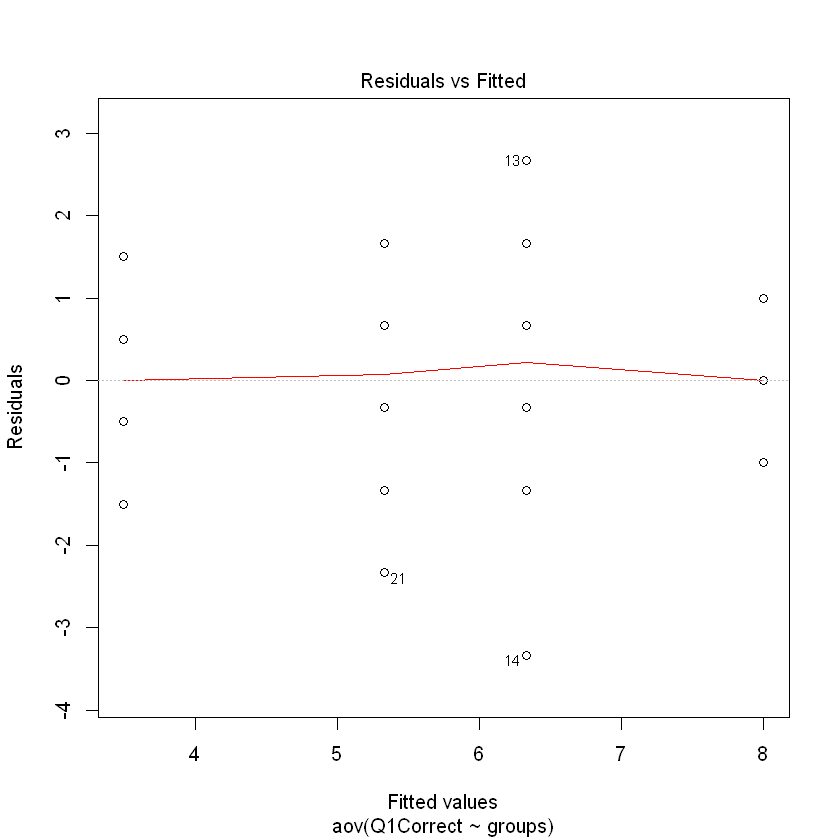


	Bartlett test of homogeneity of variances

data:  Q1Correct by groups
Bartlett's K-squared = 4.3969, df = 3, p-value = 0.2217



	Anderson-Darling normality test

data:  aov1$residuals
A = 0.20042, p-value = 0.8672


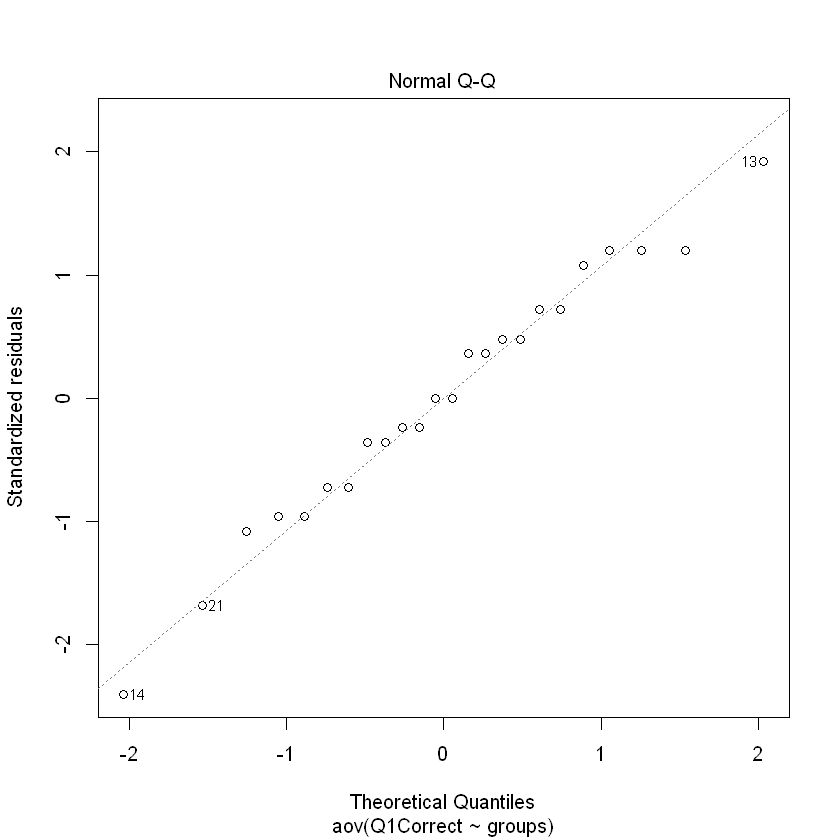


	Bartlett test of homogeneity of variances

data:  Q1Correct by interaction(groups, gender)
Bartlett's K-squared = 4.7694, df = 7, p-value = 0.6881



	Anderson-Darling normality test

data:  aov2$residuals
A = 0.48471, p-value = 0.2067


              Df Sum Sq Mean Sq F value  Pr(>F)   
groups         3  63.79  21.264   8.953 0.00103 **
gender         1   7.08   7.078   2.980 0.10353   
groups:gender  3   1.09   0.363   0.153 0.92640   
Residuals     16  38.00   2.375                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

            Df Sum Sq Mean Sq F value   Pr(>F)    
groups       3  63.79  21.264  10.336 0.000298 ***
gender       1   7.08   7.078   3.441 0.079195 .  
Residuals   19  39.09   2.057                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

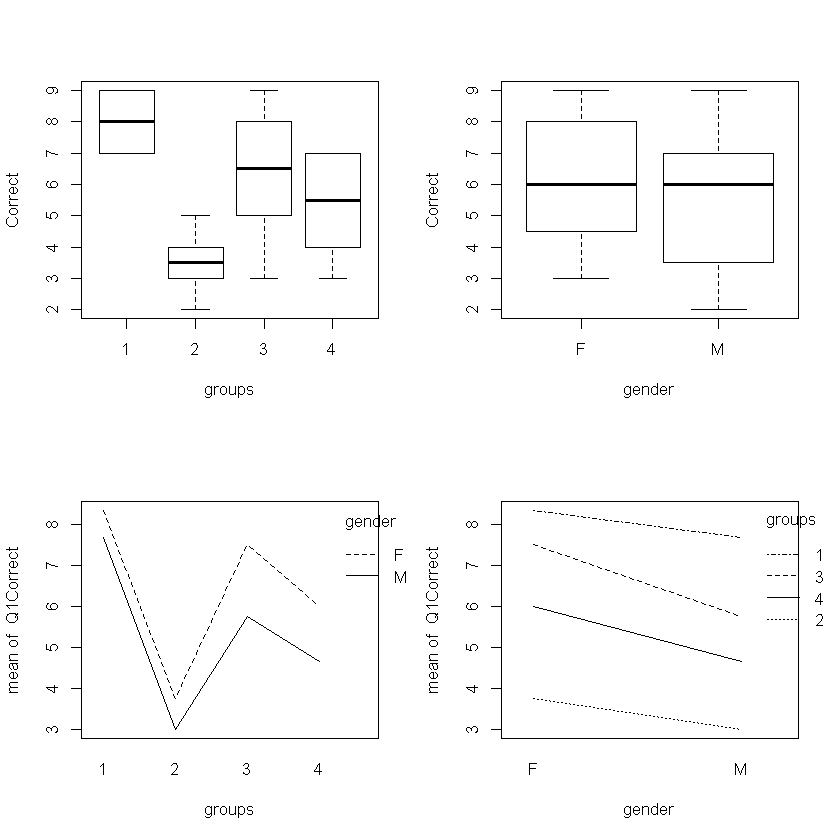

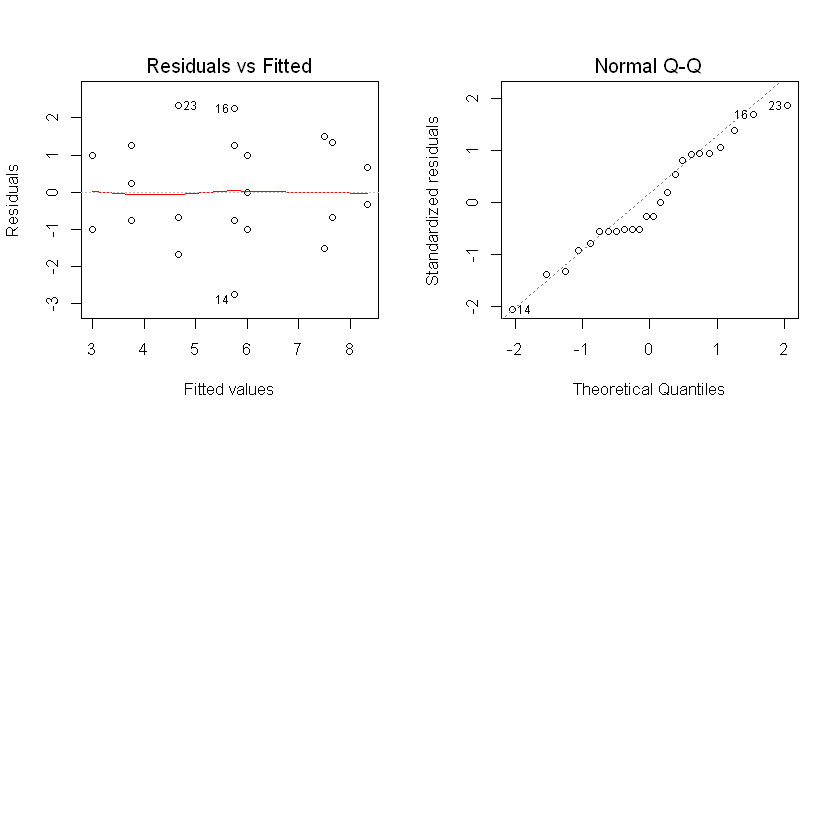

In [12]:
#3.1 and beyond
Lab3data <- read_excel("MATPMD1LabSession3Data.xlsx",range="A1:C25")
attach(Lab3data)

# set up the group factor
groups<-factor(Q1Group)

# plot the data
plot(groups, Q1Correct,xlab="groups",ylab="Q1Correct")

# and run the one-way ANOVA
aov1<-aov(Q1Correct~groups)

summary(aov1)

# include nortest library that has ad.test
library(nortest)
# include car library that has levenTest
library(car)

# plot residuals against fitted values to check equal
# variance
plot(aov1,1)
# plot residuals against theoretical normal distribution
# values to check normality
plot(aov1,2)

# verify common variance with Bartlett test
bartlett.test(Q1Correct~groups)
# verify normality with Anderson Darling test
ad.test(aov1$residuals)

# Now we are going to add gender in as a factor 
gender<-factor(Q1Gender)

par(mfrow=c(2,2))
plot(groups, Q1Correct,xlab="groups",ylab="Correct")
plot(gender, Q1Correct,xlab="gender",ylab="Correct")
interaction.plot(groups,gender,Q1Correct)
interaction.plot(gender,groups,Q1Correct)

# and run the one-way ANOVA
aov2<-aov(Q1Correct~groups*gender)

# check assumptions
plot(aov2,1)
plot(aov2,2)

# Use Bartlett test to verify equality of variance. Note that we have
# to use interaction function with the two factors.
bartlett.test(Q1Correct~interaction(groups,gender))
ad.test(aov2$residuals)

# check on whether there are significant interaction 
# effects
summary(aov2)

# no significant interaction effects so try model with
# just main effects

aov3<-aov(Q1Correct~groups+gender)

summary(aov3)

detach(Lab3data)